In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# ASD-ABA full set -  sentiment and author

In [158]:
filepath = 'data/aba_posts_re_labeled_cleaned_full_set.csv'
data = pd.read_csv(filepath)
data.head(3)

,Document,sentiment,other,aba professional,parent,asd
0,Is she in ABA therapy I only ask because my hu...,Neutral,True,False,False,False
1,I heard you are able to ask them questions May...,Neutral,True,False,False,False
2,I agree with that Even dr Lovaas said ABA does...,Positive,True,False,False,False


In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          3448 non-null   object
 1   sentiment         3448 non-null   object
 2   other             3448 non-null   bool  
 3   aba professional  3448 non-null   bool  
 4   parent            3448 non-null   bool  
 5   asd               3448 non-null   bool  
dtypes: bool(4), object(2)
memory usage: 67.5+ KB


In [160]:
sentiment_df = data.drop(columns=['other', 'aba professional', 'parent', 'asd'], axis=1)
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Document   3448 non-null   object
 1   sentiment  3448 non-null   object
dtypes: object(2)
memory usage: 54.0+ KB


In [161]:
author_df = data.drop(columns=['sentiment'], axis=1)
author_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          3448 non-null   object
 1   other             3448 non-null   bool  
 2   aba professional  3448 non-null   bool  
 3   parent            3448 non-null   bool  
 4   asd               3448 non-null   bool  
dtypes: bool(4), object(1)
memory usage: 40.5+ KB


## train-validation-test split sentiment

In [162]:
# data was cleaned previously in the project
# split data into train and test sets
from sklearn.model_selection import train_test_split

# split the data into 80% training and 20% for testing
sentiment_df_temp, sentiment_df_test = train_test_split(sentiment_df, test_size=0.2, random_state=7, stratify=sentiment_df['sentiment'])

# further splitting the training data into 20% validation and 80% training
sentiment_df_train, sentiment_df_val = train_test_split(sentiment_df_temp, test_size=0.2, random_state=7, stratify=sentiment_df_temp['sentiment'])

sentiment_df_train.shape, sentiment_df_val.shape, sentiment_df_test.shape

# train set: 2206 rows
# validation set: 552 rows
# train set: 690 rows

((2206, 2), (552, 2), (690, 2))

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset(dataset, title, color):
    counts = dataset.value_counts()

    plt.figure(figsize=(10, 6))
    ax = counts.plot(kind='bar', color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Number of posts')

    # add legend with value counts
    for i, v in enumerate(counts):
        ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')
    plt.show()

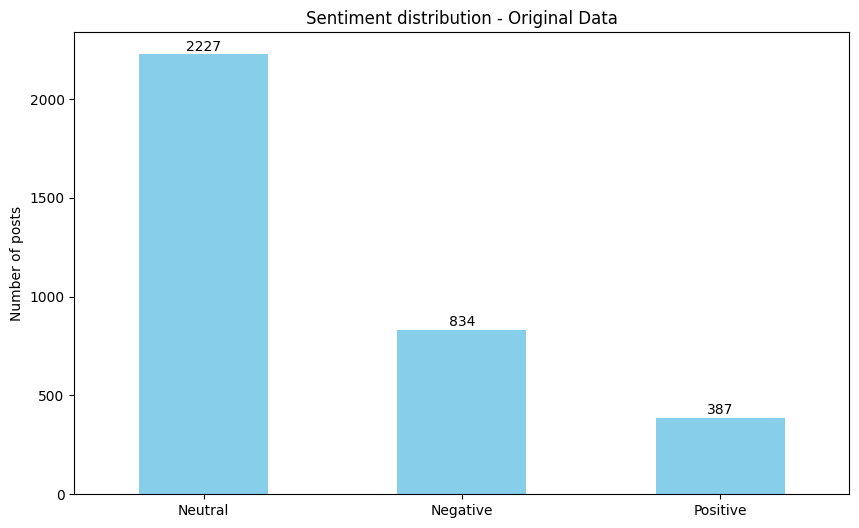

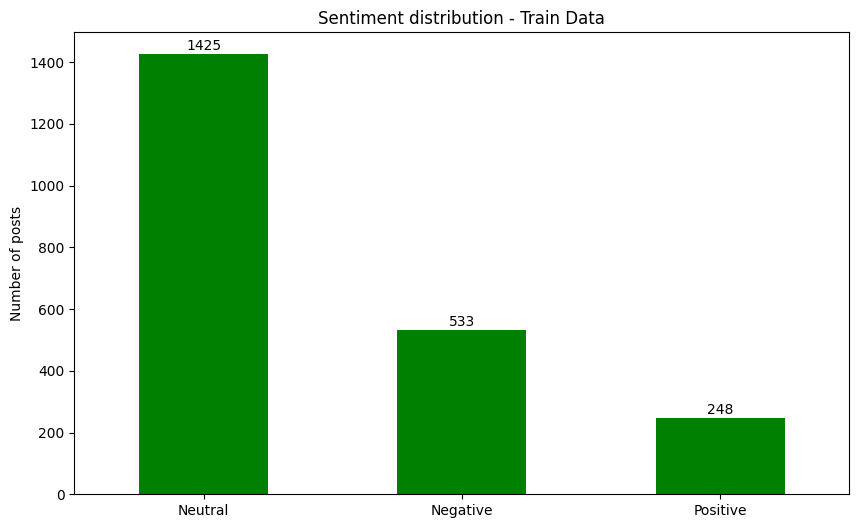

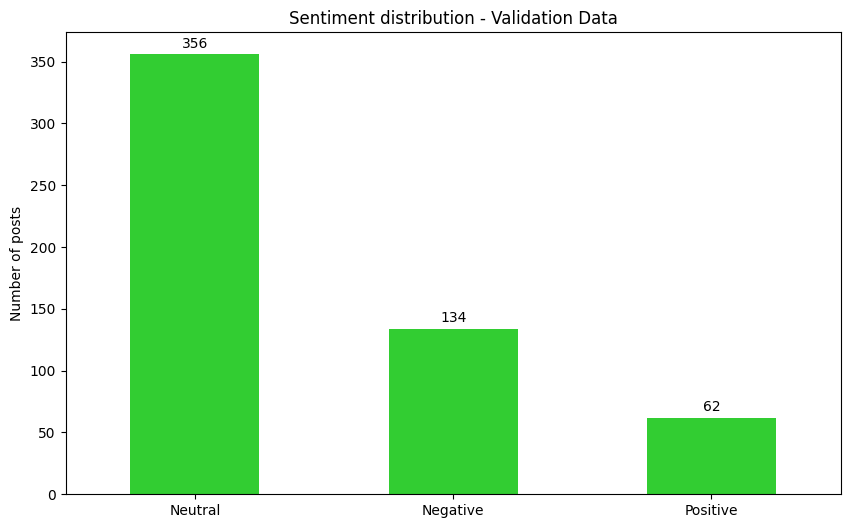

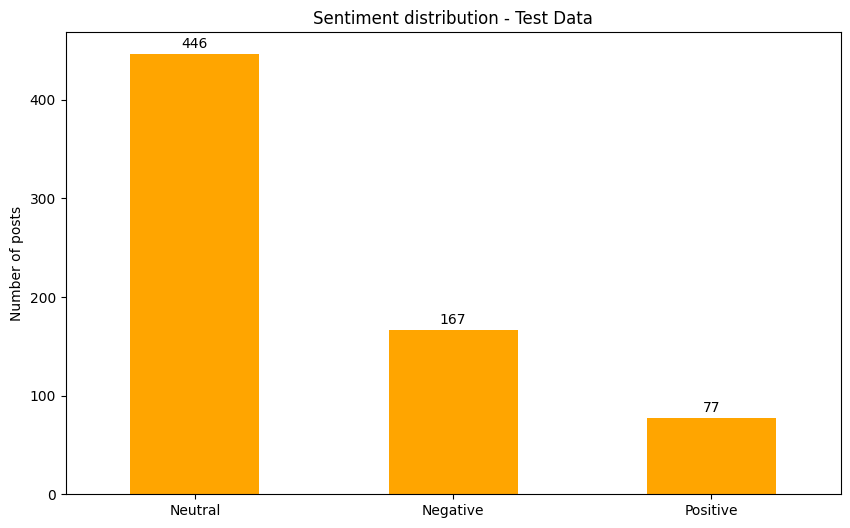

In [164]:
plot_dataset(sentiment_df['sentiment'], 'Sentiment distribution - Original Data', 'skyblue')
plot_dataset(sentiment_df_train['sentiment'], 'Sentiment distribution - Train Data', 'green')
plot_dataset(sentiment_df_val['sentiment'], 'Sentiment distribution - Validation Data', 'limegreen')
plot_dataset(sentiment_df_test['sentiment'], 'Sentiment distribution - Test Data', 'orange')

In [165]:
# save subsets as csv files
sentiment_df_train.to_csv('data/data_sentiment/sentiment_data_train_lg.csv')
sentiment_df_val.to_csv('data/data_sentiment/sentiment_data_val_lg.csv')
sentiment_df_test.to_csv('data/data_sentiment/sentiment_data_test_lg.csv')

## train-validation-test split author - binary

In [166]:
author_binary_df = author_df.drop(columns=['aba professional', 'parent', 'asd'], axis=1)
author_binary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Document  3448 non-null   object
 1   other     3448 non-null   bool  
dtypes: bool(1), object(1)
memory usage: 30.4+ KB


In [167]:
# Replace boolean values with labels
author_binary_df['other'] = author_binary_df['other'].replace({True: 'Other', False: 'ASD-ABA author'})
author_binary_df.head(2)

,Document,other
0,Is she in ABA therapy I only ask because my hu...,Other
1,I heard you are able to ask them questions May...,Other


In [168]:
# split the data into 80% training and 20% for testing
author_binary_df_train, author_binary_df_test = train_test_split(author_binary_df, test_size=0.2, random_state=7, stratify=author_binary_df['other'])

# further splitting the training data into 20% validation and 80% training
author_binary_df_train, author_binary_df_val = train_test_split(author_binary_df_train, test_size=0.2, random_state=7, stratify=author_binary_df_train['other'])

author_binary_df_train.shape, author_binary_df_val.shape, author_binary_df_test.shape


((2206, 2), (552, 2), (690, 2))

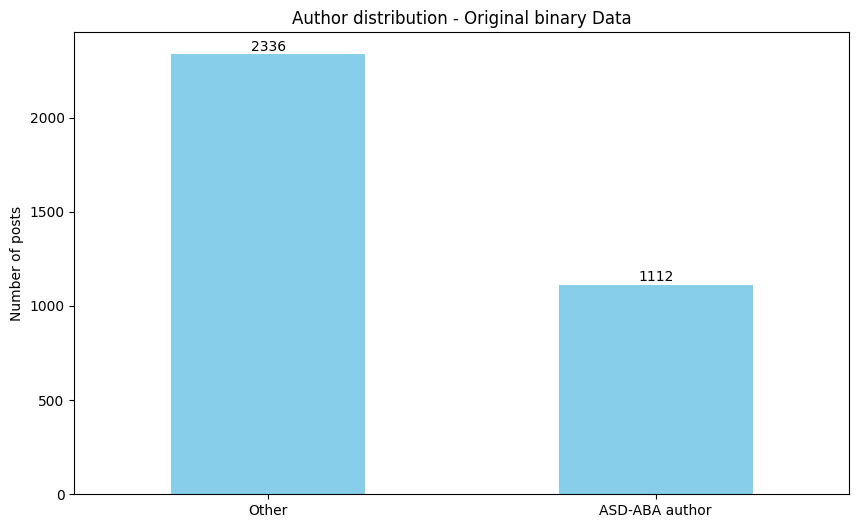

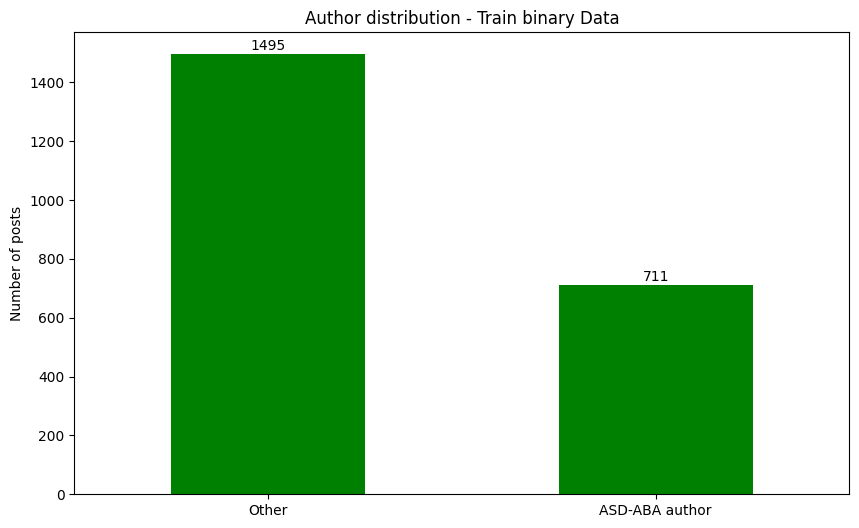

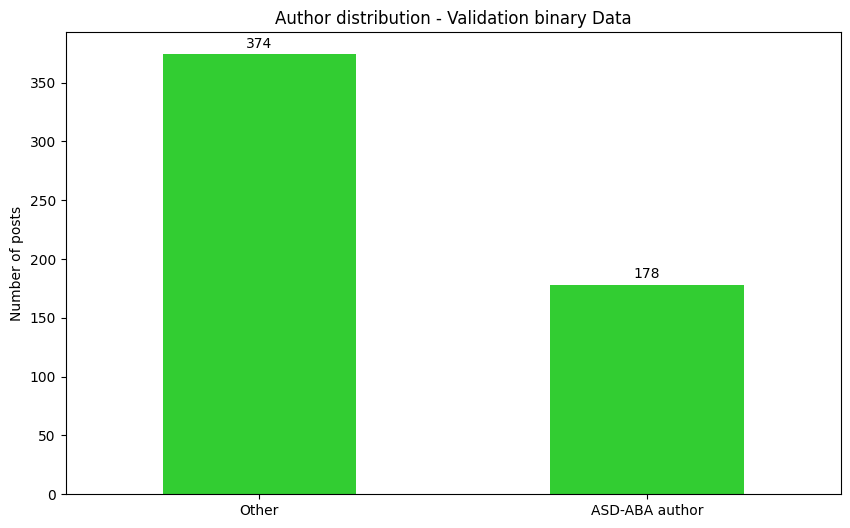

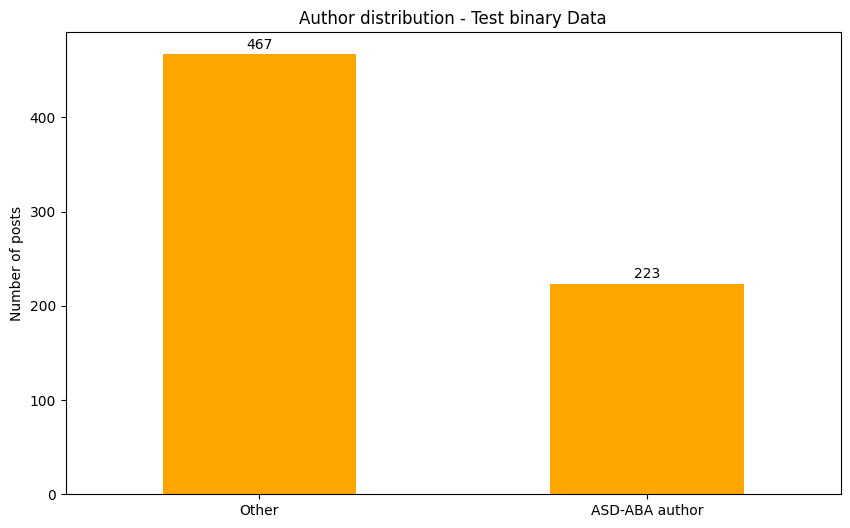

In [169]:
plot_dataset(author_binary_df['other'], 'Author distribution - Original binary Data', 'skyblue')
plot_dataset(author_binary_df_train['other'], 'Author distribution - Train binary Data', 'green')
plot_dataset(author_binary_df_val['other'], 'Author distribution - Validation binary Data', 'limegreen')
plot_dataset(author_binary_df_test['other'], 'Author distribution - Test binary Data', 'orange')

In [170]:
# save subsets as csv files
author_binary_df_train.to_csv('data/data_author_binary/author_data_train.csv')
author_binary_df_val.to_csv('data/data_author_binary/author_data_val.csv')
author_binary_df_test.to_csv('data/data_author_binary/author_data_test.csv')

## train-validation-test split ASD-ABA author

In [171]:
# get dataset with only ASD-ABA authors for multi-label classification
author_asd_aba_df = author_df[author_df['aba professional'] | author_df['parent'] | author_df['asd']]
author_asd_aba_df = author_asd_aba_df.drop(columns=['other'], axis=1)
author_asd_aba_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1112 entries, 3 to 3445
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Document          1112 non-null   object
 1   aba professional  1112 non-null   bool  
 2   parent            1112 non-null   bool  
 3   asd               1112 non-null   bool  
dtypes: bool(3), object(1)
memory usage: 20.6+ KB


In [172]:
%%capture
%pip install iterative-stratification

In [173]:
# because multilabel classification, stratification needs to take into account the distribution of pair columns as well and individual ones
# https://github.com/trent-b/iterative-stratification
# Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data. In: Gunopulos D., Hofmann T., Malerba D., Vazirgiannis M. (eds) Machine Learning and Knowledge Discovery in Databases. ECML PKDD 2011. Lecture Notes in Computer Science, vol 6913. Springer, Berlin, Heidelberg.
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

X = author_asd_aba_df[['Document']]
y = author_asd_aba_df[['aba professional', 'parent', 'asd']]

msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=7)

# train(temp) -test data split - 20% test and 80% train
for temp_index, test_index in msss.split(X, y):
    X_temp, X_test = X.iloc[temp_index], X.iloc[test_index]
    y_temp, y_test = y.iloc[temp_index], y.iloc[test_index]

## train -validation data split - 20% validation and 80% train
for train_index, val_index in msss.split(X_temp, y_temp):
    X_train, X_val = X_temp.iloc[train_index], X_temp.iloc[val_index]
    y_train, y_val = y_temp.iloc[train_index], y_temp.iloc[val_index]

print(X_train.shape,X_val.shape, X_test.shape)
print(y_train.shape,  y_val.shape, y_test.shape)

# merge x and y into one df
author_asd_aba_df_train = pd.DataFrame(np.concatenate([X_train, y_train], axis=1), columns=['Document', 'aba professionals', 'parents', 'asd'])
# author_asd_aba_df_train.head()
author_asd_aba_df_val = pd.DataFrame(np.concatenate([X_val, y_val], axis=1), columns=['Document', 'aba professionals', 'parents', 'asd'])
# author_asd_aba_df_val.head()
author_asd_aba_df_test = pd.DataFrame(np.concatenate([X_test, y_test], axis=1), columns=['Document', 'aba professionals', 'parents', 'asd'])
# author_asd_aba_df_test.head()

(712, 1) (179, 1) (221, 1)
(712, 3) (179, 3) (221, 3)


In [174]:
def plot_dataset_multilabel(dataset, title, color):
    # counts = dataset.value_counts()
    counts = dict()

    # get the true counts for each col
    for col in dataset.columns:
        value_counts = dataset[col].value_counts()
        counts[col] = value_counts[True]

    plt.figure(figsize=(10, 6))
    ax = pd.Series(counts).plot(kind='bar', color=color)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

    plt.title(title)
    plt.xlabel('')
    plt.ylabel('Number of posts')

    # add legend with value counts
    for i, (col, v) in enumerate(counts.items()):
        ax.text(i, v + 3, str(v), color='black', ha='center', va='bottom')
    plt.show()

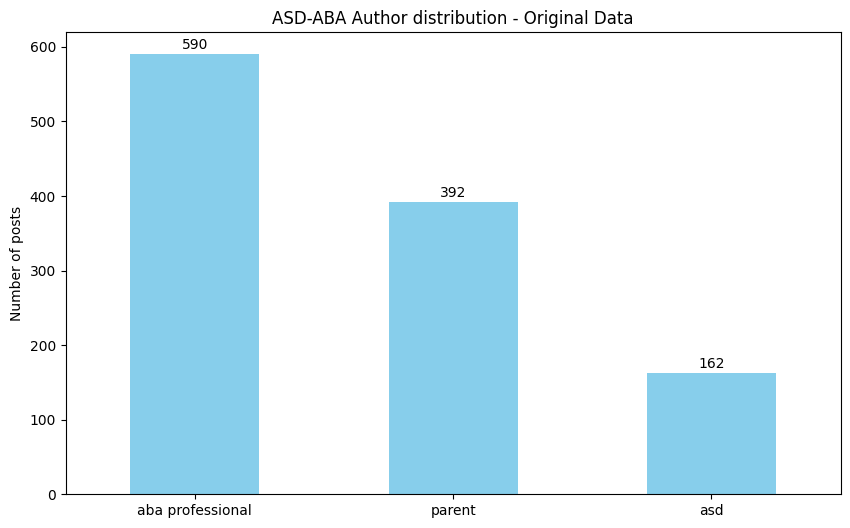

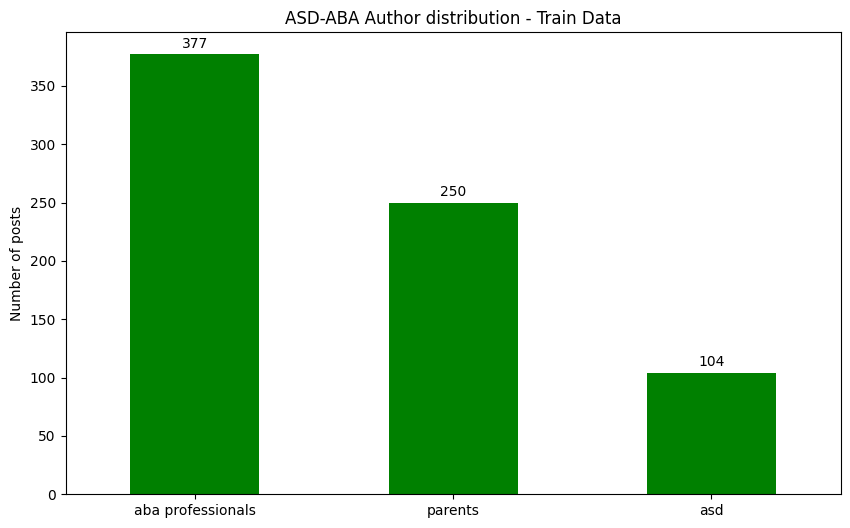

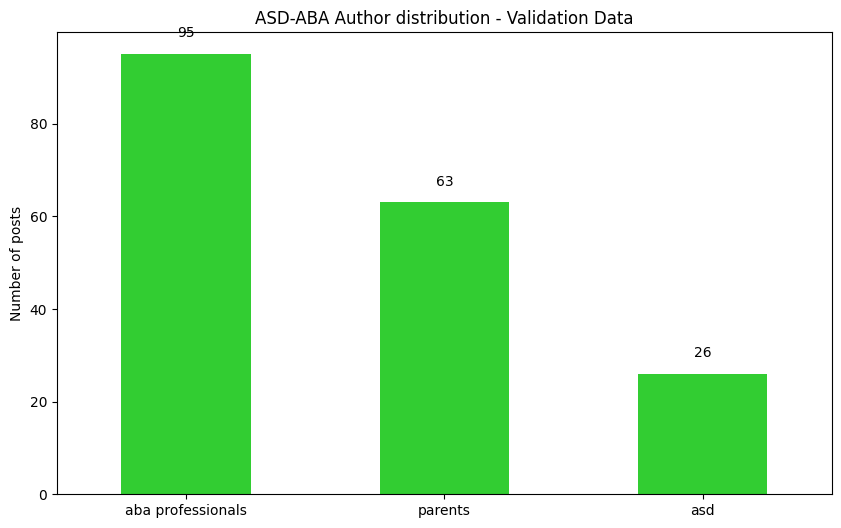

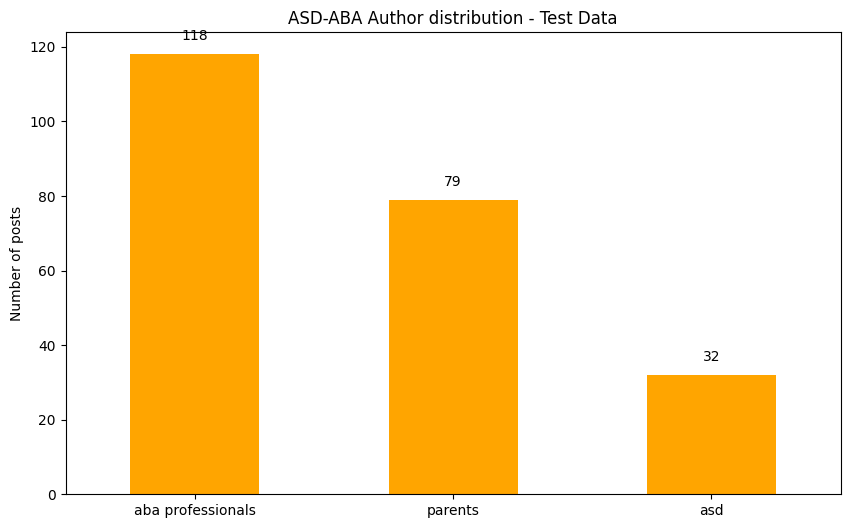

In [175]:
plot_dataset_multilabel(author_asd_aba_df.drop(columns=['Document'], axis=1), 'ASD-ABA Author distribution - Original Data', 'skyblue')
plot_dataset_multilabel(author_asd_aba_df_train.drop(columns=['Document'], axis=1), 'ASD-ABA Author distribution - Train Data', 'green')
plot_dataset_multilabel(author_asd_aba_df_val.drop(columns=['Document'], axis=1), 'ASD-ABA Author distribution - Validation Data', 'limegreen')
plot_dataset_multilabel(author_asd_aba_df_test.drop(columns=['Document'], axis=1), 'ASD-ABA Author distribution - Test Data', 'orange')

In [176]:
# save subsets as csv files
author_asd_aba_df_train.to_csv('data/data_author_asd_aba/author_data_train.csv')
author_asd_aba_df_val.to_csv('data/data_author_asd_aba/author_data_val.csv')
author_asd_aba_df_test.to_csv('data/data_author_asd_aba/author_data_test.csv')

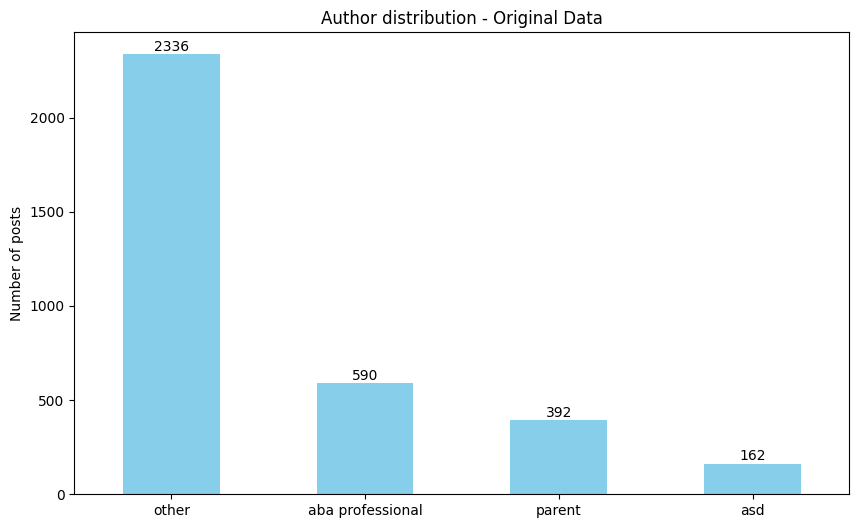

In [177]:
# all author distribution
plot_dataset_multilabel(author_df.drop(columns=['Document'], axis=1), 'Author distribution - Original Data', 'skyblue')


In [178]:
author_asd_aba_df_train.head(3)

,Document,aba professionals,parents,asd
0,Thank you so so much for sharing your experien...,False,True,False
1,I started my program in September My company h...,True,False,False
2,As a BT I try and sit in on SLP sessions and u...,True,False,False
